<a href="https://colab.research.google.com/github/georgeragan/ALGERIAN-FOREST-FIRE-PREDICTION/blob/main/ALGERIAN_FOREST_FIRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**LOADING THE DATA SETS**

In [2]:
data=pd.read_csv("/content/Algerian_forest_fires_dataset.csv")

**GETTING 5 ROWS**

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**GETTING SHAPE**

In [4]:
data.shape

(247, 14)

**GETTING THE INFO ABOUT DATASETS**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


**CHECKING NULL VALUES**

In [6]:
data.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


**ADDING A NEW COLUMN**

In [7]:
data.loc[:122,"Region"]=0
data.loc[123:,"Region"]=1

**GETTING THE NULL VALUES**

In [8]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


**DROPING NULL VALUES**

In [9]:
data=data.dropna().reset_index(drop=True)

**CHECKING NULL VALUES**

In [10]:
data.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


**REMOVING PARTICULAR ROW**

In [12]:
data.iloc[[122]]
data=data.drop(122).reset_index(drop=True)



**REMOVING COLUMN SPACES**

In [13]:
data.columns
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**CONVERTING DTYPE TO INT AND FLOAT**

In [16]:
data[['month','day','year','Temperature','RH','Ws',"Region"]]=data[['month','day','year','Temperature','RH','Ws',"Region"]].astype(int)
objects=[features for features in data.columns if data[features].dtypes=="O"]
for i in objects:
  if i!="Classes":
    data[i]=data[i].astype(float)

**CHECKING THE DTYPE**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


**SAVING THE CLEANED DATASET**

In [18]:
data.to_csv("fires_cleaned.csv",index=False)

**LOADING THE DATASET**

In [19]:
data=pd.read_csv("/content/fires_cleaned.csv")

**MAKING A COPY OF DATASET**

In [20]:
data1=data
data1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**REMOVING THE UNWANTED FEATURES**

In [21]:
data1=data1.drop(["day","month","year"],axis=1)

**ENCODING THE TARGET CLASSES**

In [22]:
data1["Classes"]=np.where(data1["Classes"].str.contains("not fire"),0,1)

In [23]:
data1["Classes"].value_counts()

,count
Classes,
1,137
0,106


**VISUALISATION**

<ipython-input-24-ec1e08689cf5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


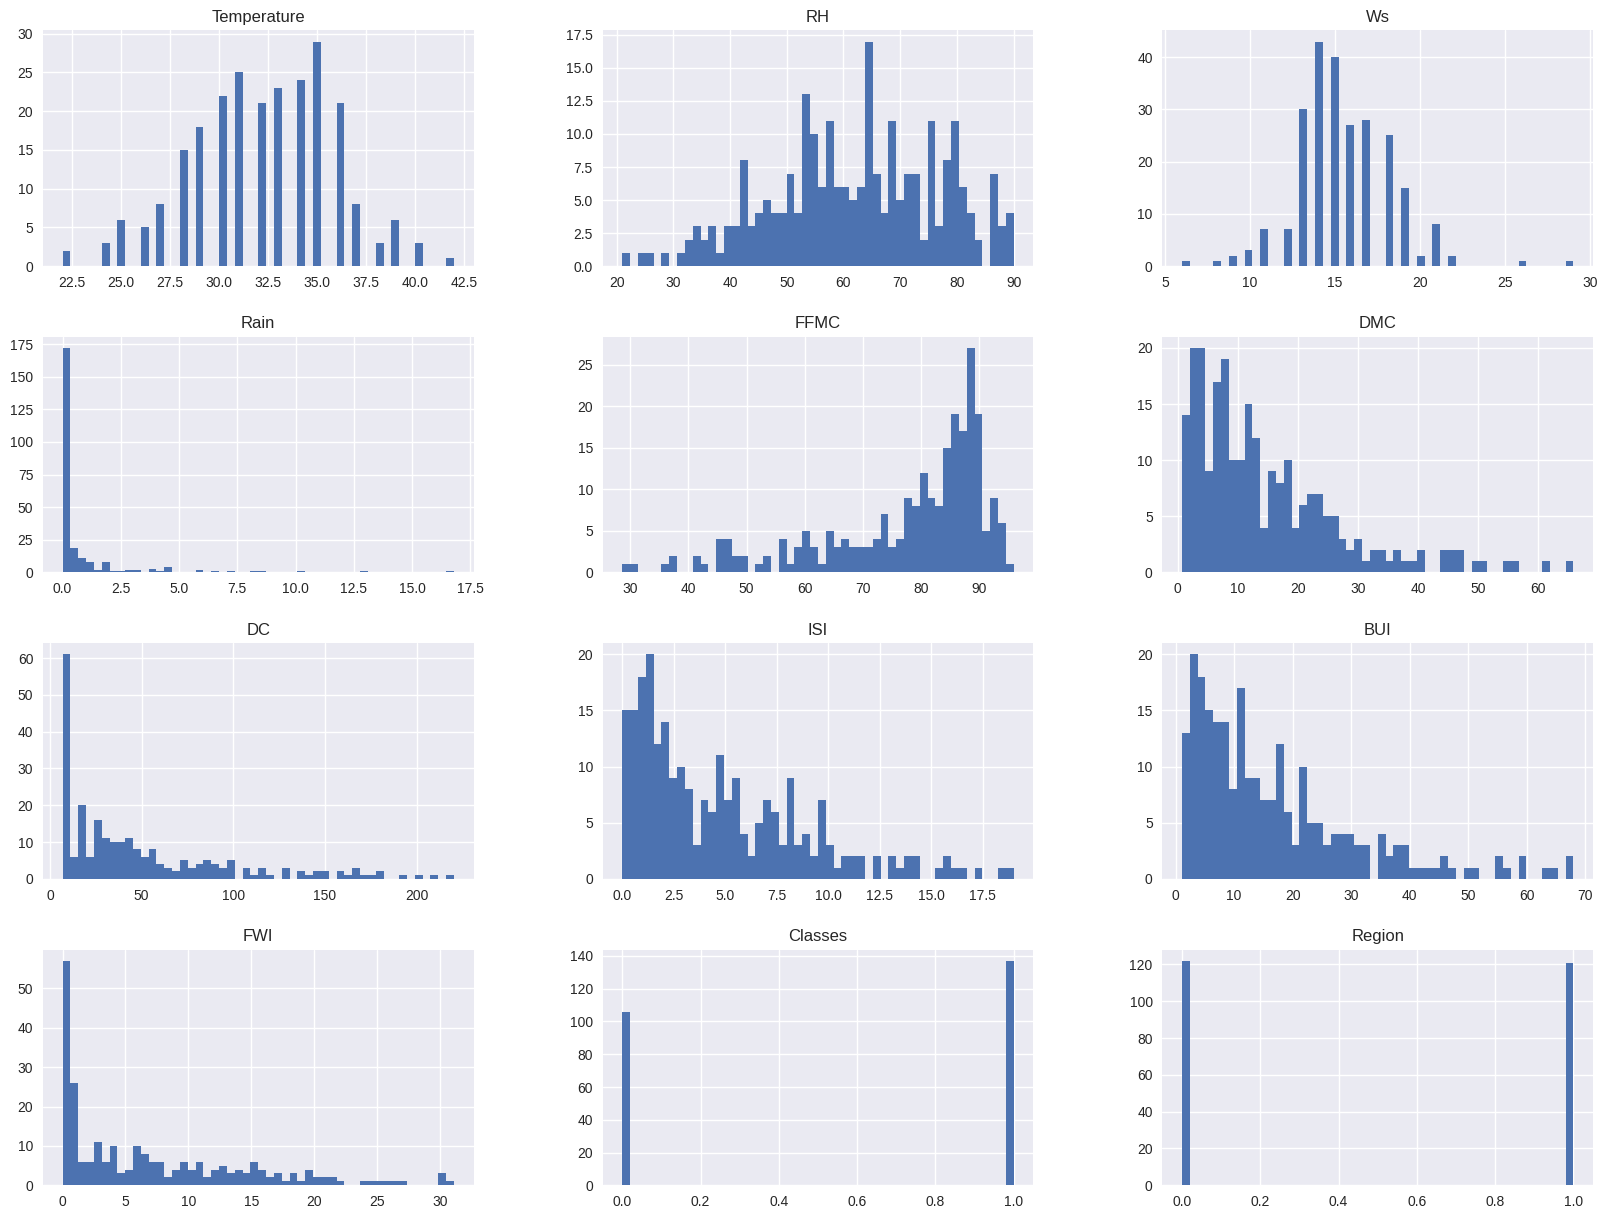

In [24]:
plt.style.use('seaborn')
data1.hist(bins=50,figsize=(20,15))
plt.show()

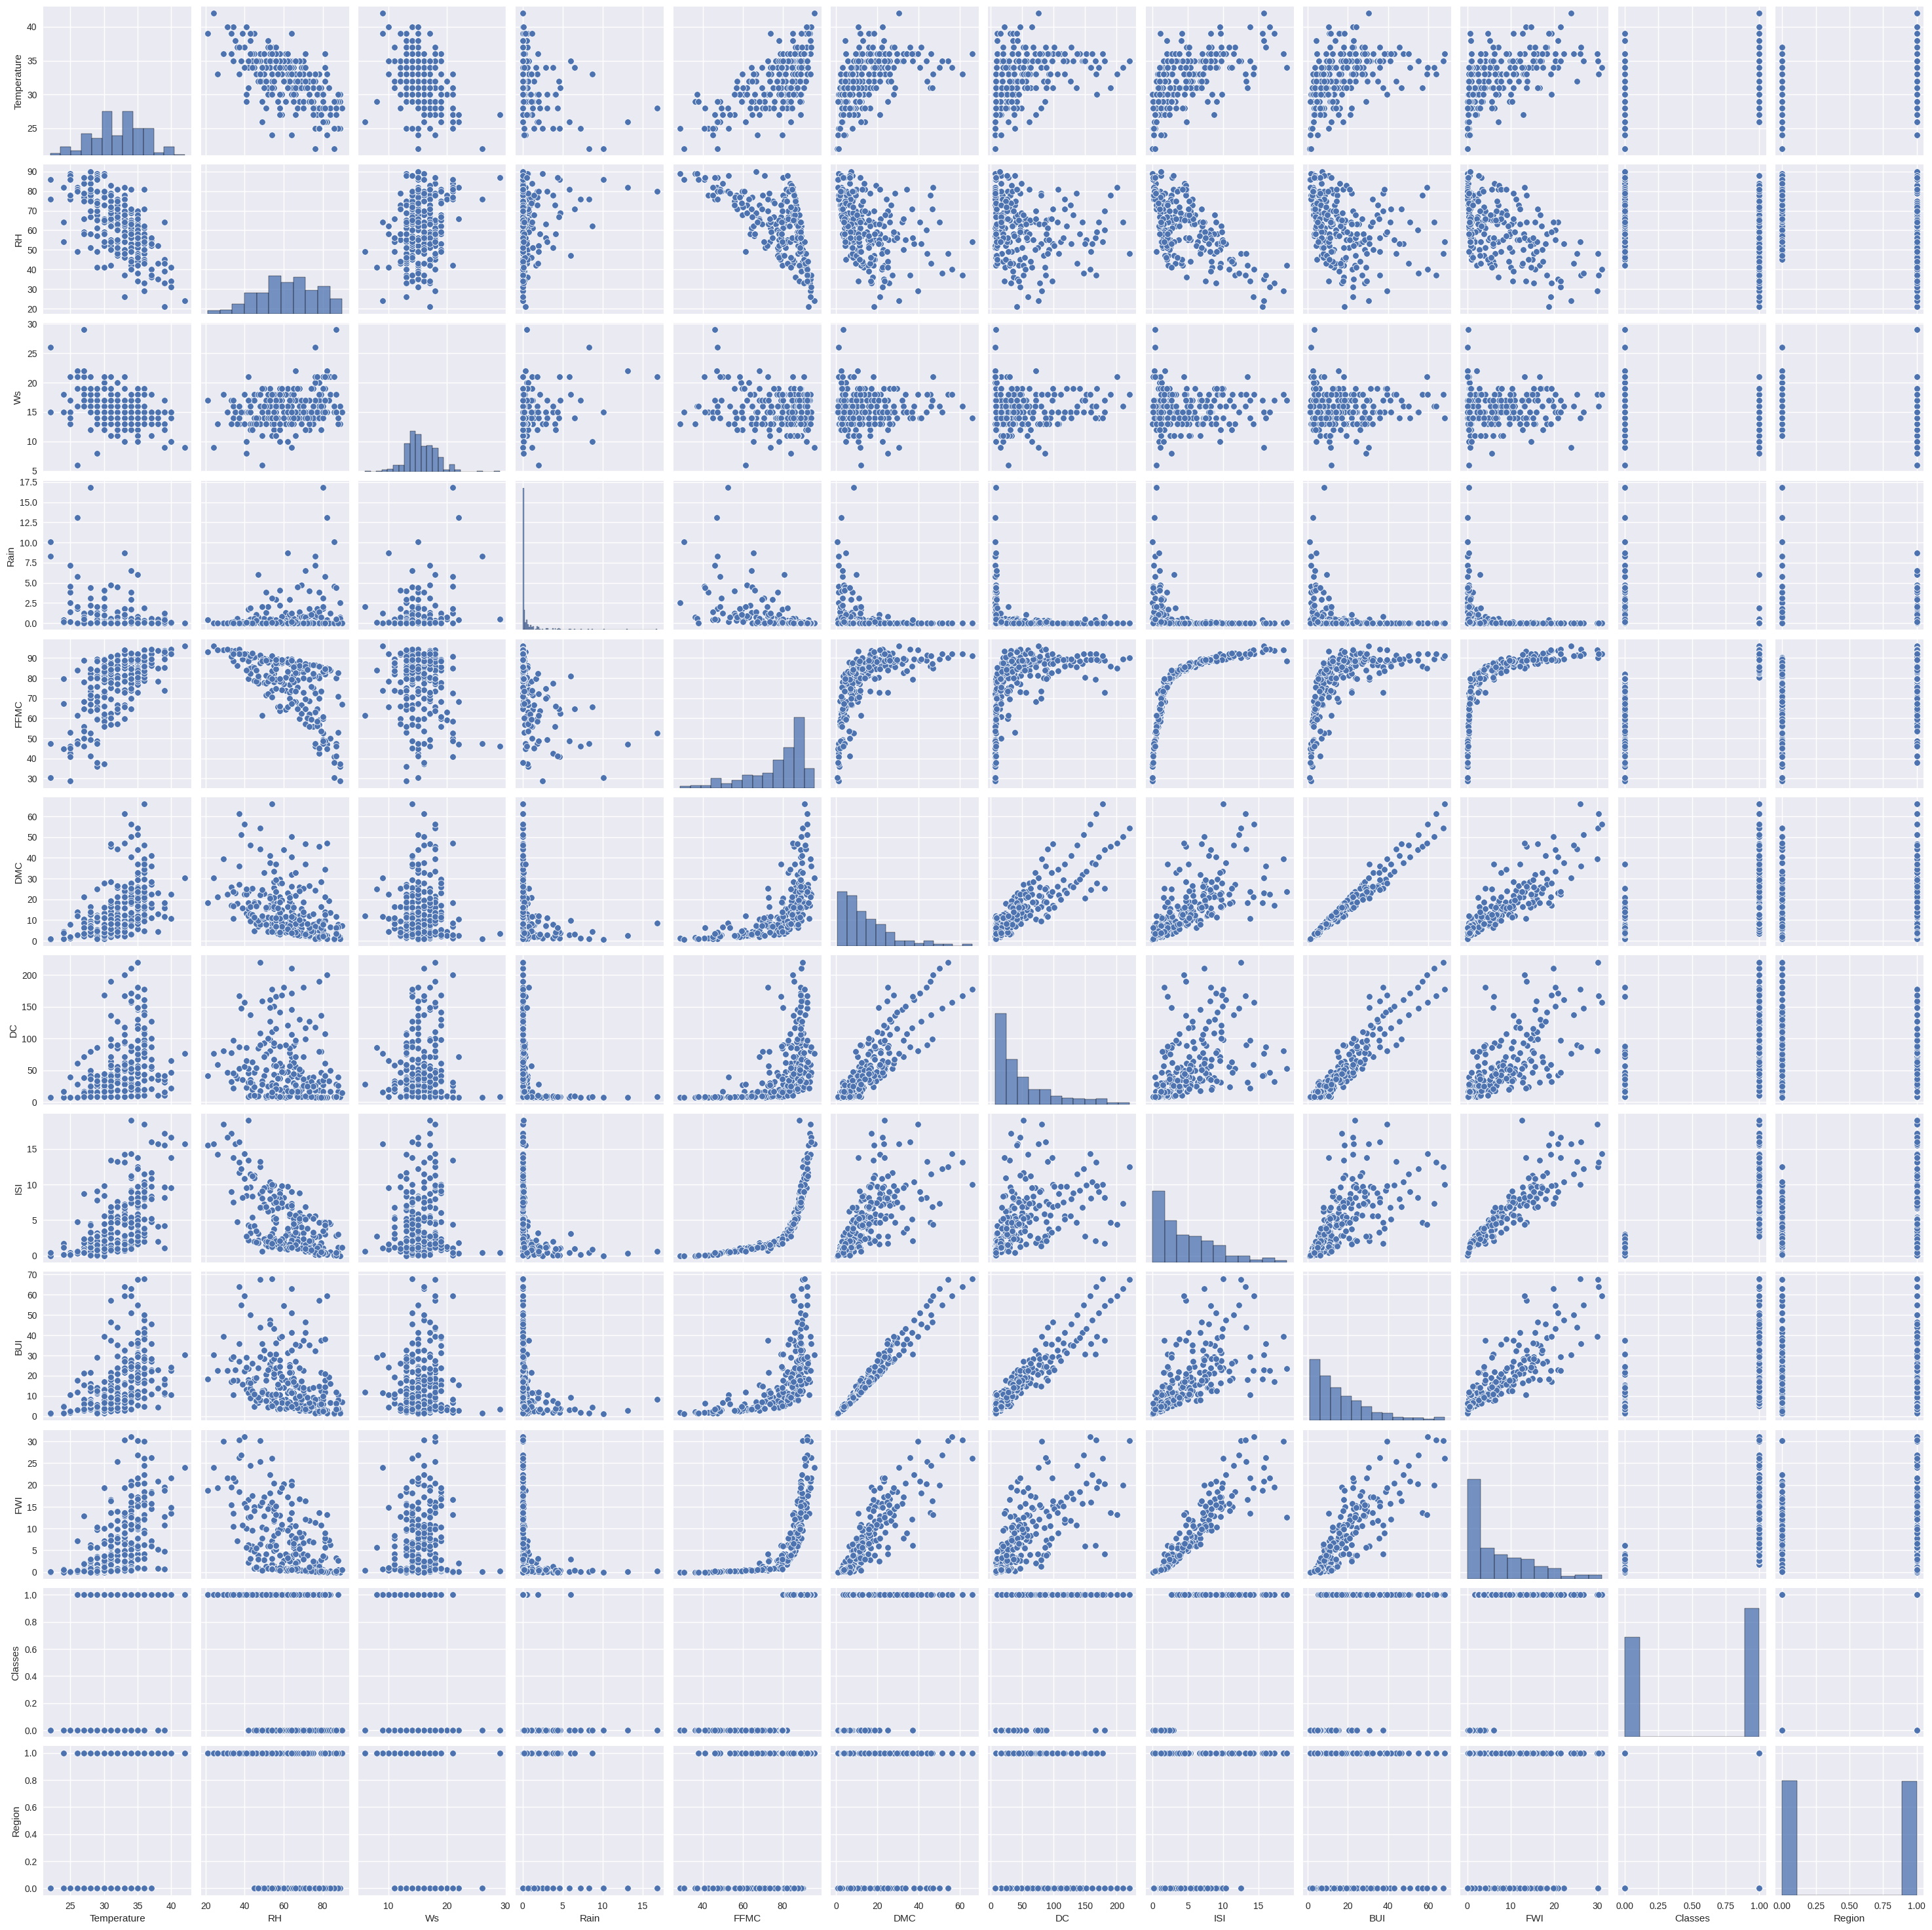

In [25]:
sns.pairplot(data1)

**PIE CHART**

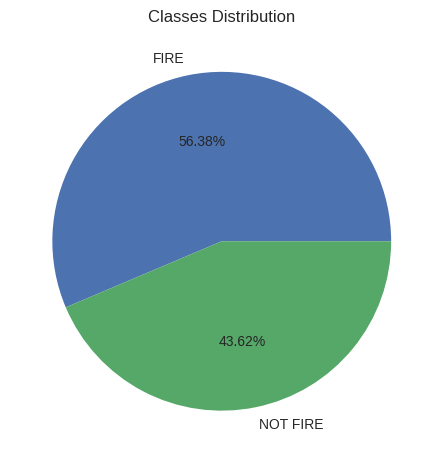

In [26]:
percentage=data1["Classes"].value_counts(normalize=True)
classlabels=["FIRE","NOT FIRE"]
plt.pie(percentage,labels=classlabels,autopct="%1.2f%%")
plt.title("Classes Distribution")
plt.show()

**HEAT MAP**

<Axes: >

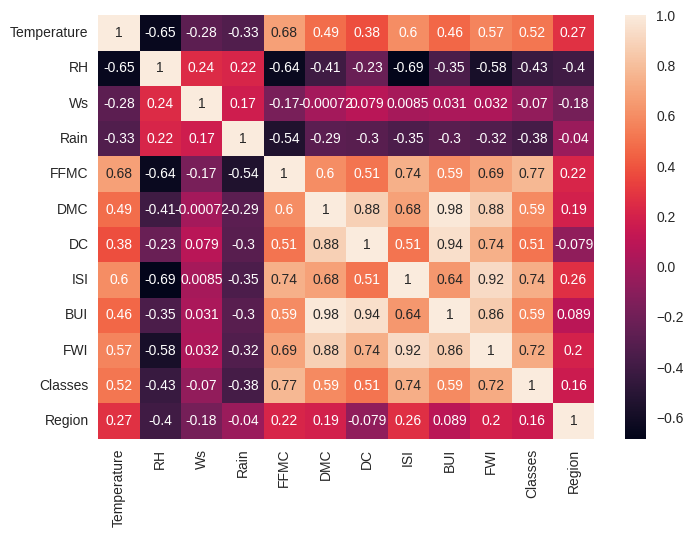

In [27]:
data1.corr()
sns.heatmap(data1.corr(),annot=True)

In [28]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


**VISUALISATION IN DIFFERENT MONTH**

Text(0.5, 1.0, 'Classes Distribution in Region 1')

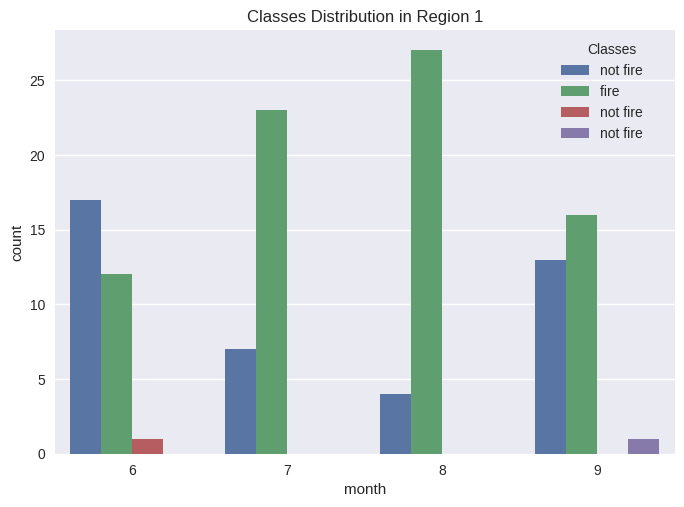

In [29]:
dftemp=data.loc[data["Region"]==1]

sns.countplot(x="month",hue="Classes",data=dftemp)
plt.title("Classes Distribution in Region 1")



In [30]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Text(0.5, 1.0, 'Classes Distribution in Region 2')

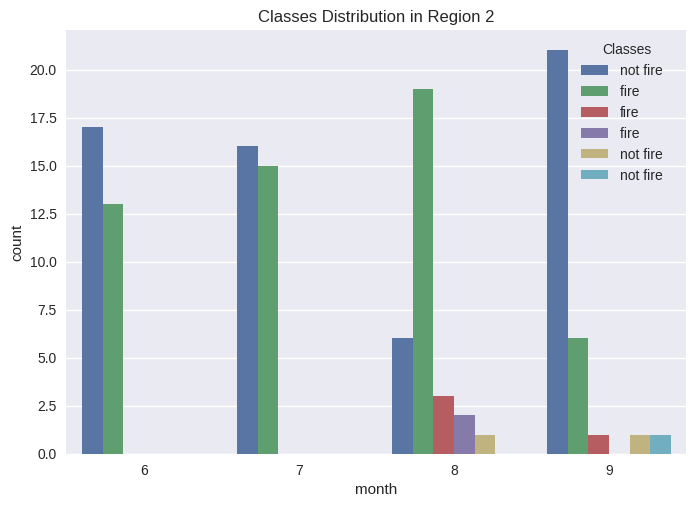

In [49]:
dftemp=data.loc[data["Region"]==0]

sns.countplot(x="month",hue="Classes",data=dftemp)
plt.title("Classes Distribution in Region 2")



In [32]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


**REMOVING THE UNWANTED COLUMN**

In [33]:
X=data1.drop(['FWI'],axis=1)
y=data1["FWI"]

**TRAIN TEST SPLIT**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [36]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


**SCALLING THE FEATURES USING STANDARD SCALER**

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

<ipython-input-38-688ff0854994>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'after scaling')

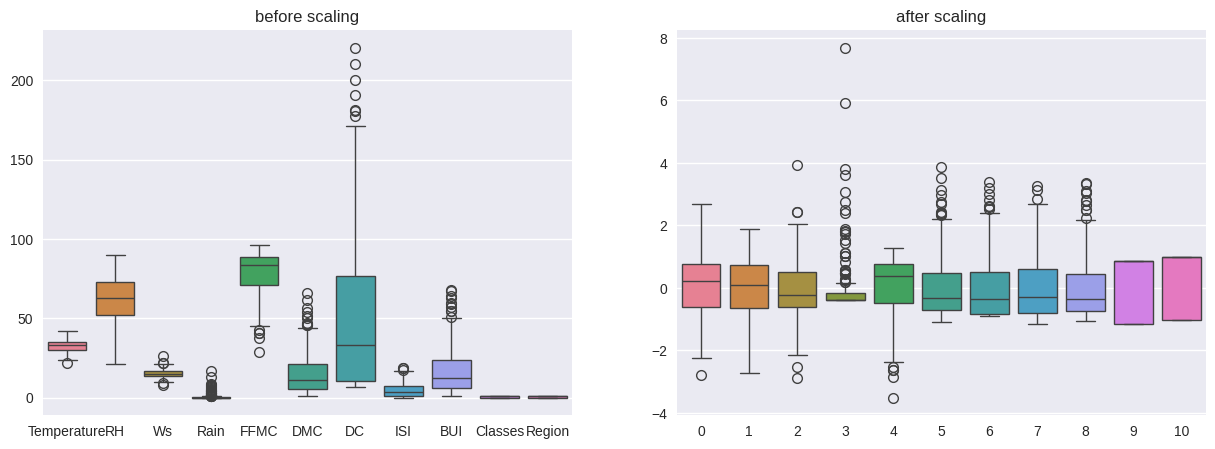

In [38]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title("after scaling")


**BUILDING LINEAR REGRESSION MODEL,PREDICTING AND ACCURACY CALCULATION**

0.9890356825759857
0.33231115384863824
0.4267520614689853
0.5764643560955337


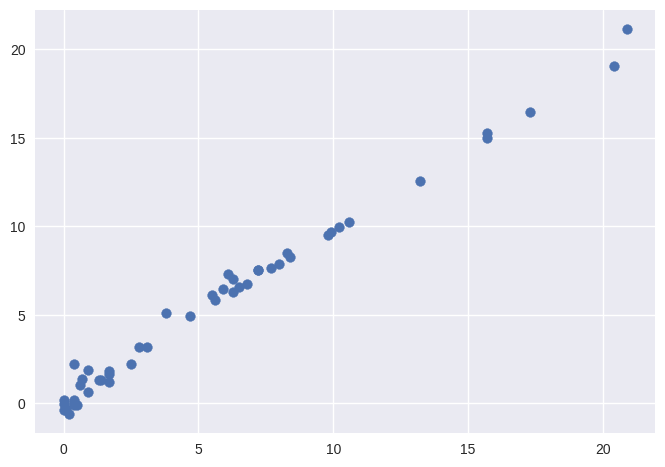

In [41]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_sc,y_train)
y_pred=model.predict(X_test_sc)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
plt.scatter(y_test,y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**BUILDING LASSO REGRESSION MODEL,PREDICTING AND ACCURACY CALCULATION**

0.9527917018651335
1.4308089977464673
0.9552746314709515
1.1961642854334296


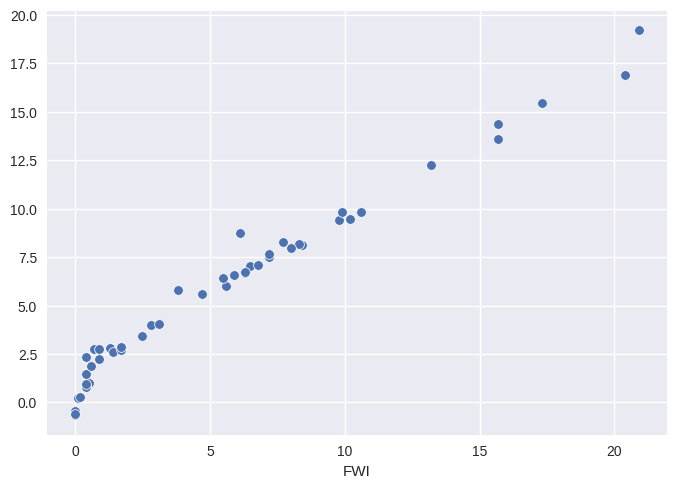

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_sc,y_train)
y_pred=lasso.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**BUILDING RIDGE REGRESSION MODEL,PREDICTING AND ACCURACY CALCULATION**

0.9845121782477887
0.4694114296442019
0.46348598120275497
0.6851360665183245


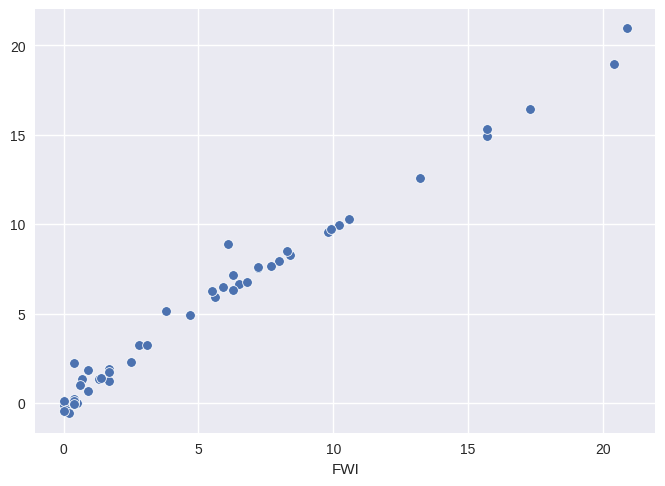

In [43]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_sc,y_train)
y_pred=ridge.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**BUILDING ELASTICNET REGRESSION MODEL,PREDICTING AND ACCURACY CALCULATION**

0.8829107841423941
3.5487893062683153
1.5279150847018705
1.8838230559870306


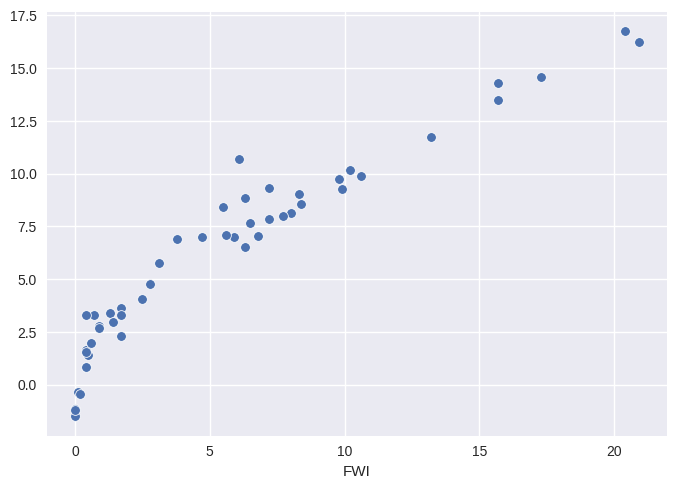

In [44]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_sc,y_train)
y_pred=elastic.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**HYPER TUNING OF LASSO REGRESSION USING CROSS VALIDATION**

0.9882488186747138
0.35615975662447386
0.4207314208345752
0.5967912169464912


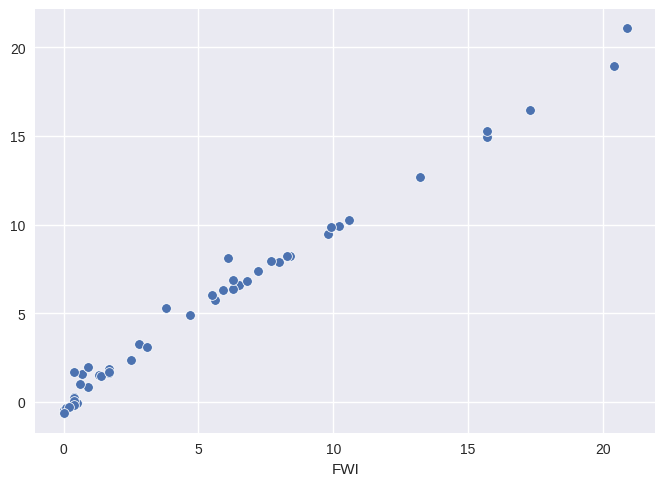

In [45]:
from sklearn.linear_model import LassoCV
Lassocv=LassoCV(cv=5,random_state=0)
Lassocv.fit(X_train_sc,y_train)
y_pred=Lassocv.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**HYPER TUNING OF RIDGE REGRESSION USING CROSS VALIDATION**

0.973678374453303
0.7977669213987616
0.639514606918707
0.8931779897639449


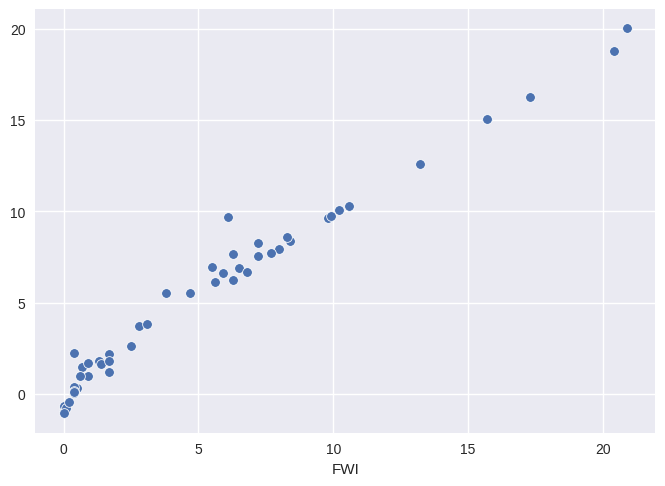

In [46]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_sc,y_train)
y_pred=ridgecv.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

**HYPER TUNING OF ELASTICNET REGRESSION USING CROSS VALIDATION**

0.982573443975273
0.528171405134742
0.49674555626350636
0.7267540196894283


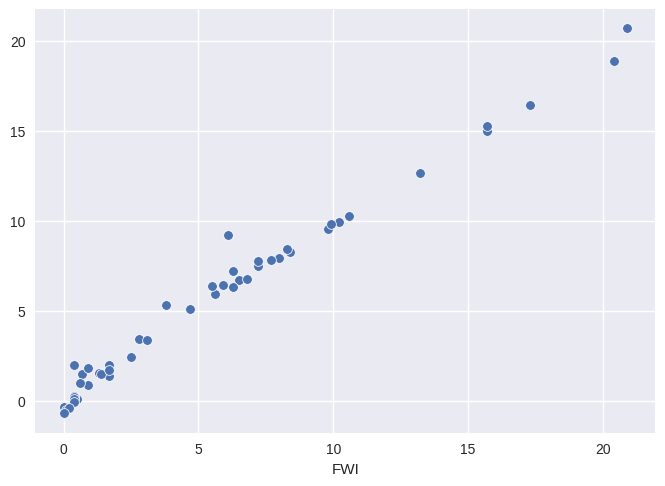

In [47]:
from sklearn.linear_model import ElasticNetCV
elastic=ElasticNetCV(cv=5)
elastic.fit(X_train_sc,y_train)
y_pred=elastic.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)